# Import modules

In [1]:
from pyvad import vad, trim, split
from librosa import load
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

# Speech data load

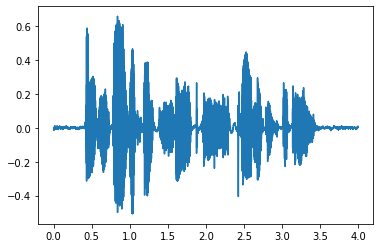

In [2]:
name = "test/voice/arctic_a0007.wav"
data, fs = load(name)
time = np.linspace(0, len(data)/fs, len(data)) # time axis
plt.plot(time, data)
plt.show()

# Do VAD (int)

In [3]:
%time vact = vad(data, fs, fs_vad = 16000, hop_length = 30, vad_mode=3)

CPU times: user 85.3 ms, sys: 3.04 ms, total: 88.4 ms
Wall time: 87.6 ms


# Plot result

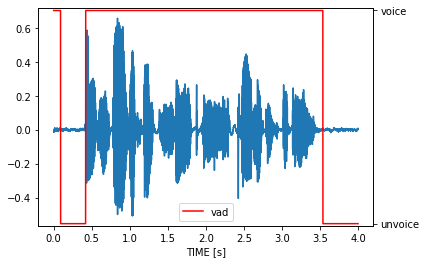

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(time, data, label='speech waveform')
ax1.set_xlabel("TIME [s]")

ax2=ax1.twinx()
ax2.plot(time, vact, color="r", label = 'vad')
plt.yticks([0, 1] ,('unvoice', 'voice'))
ax2.set_ylim([-0.01, 1.01])

plt.legend()
plt.show()

# trim

In [5]:
%time edges = trim(data, fs, fs_vad = 16000, hop_length = 30, vad_mode=3)

CPU times: user 90.8 ms, sys: 3.87 ms, total: 94.7 ms
Wall time: 95.9 ms


# Plot result

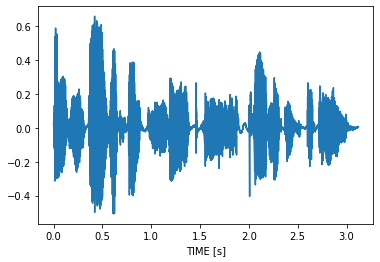

In [6]:
trimed = data[edges[0]:edges[1]]
time = np.linspace(0, len(trimed)/fs, len(trimed)) # time axis
fig, ax1 = plt.subplots()

ax1.plot(time, trimed, label='speech waveform')
ax1.set_xlabel("TIME [s]")

plt.show()

# split

In [7]:
%time segments = split(data, fs, fs_vad = 8000, hop_length = 10, vad_mode=3)

CPU times: user 83 ms, sys: 2.9 ms, total: 85.9 ms
Wall time: 85.4 ms


# Plot result

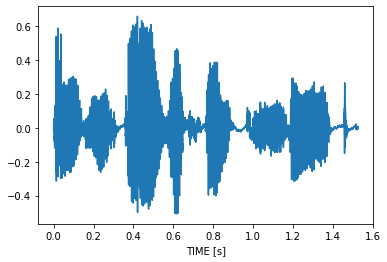

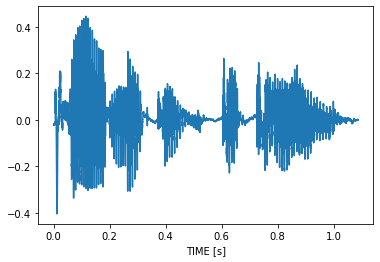

In [8]:
for i, seg in enumerate(segments):
    time = np.linspace(0, len(seg)/fs, len(seg)) # time axis
    
    fig, ax1 = plt.subplots()

    ax1.plot(time, seg, label='speech waveform')
    ax1.set_xlabel("TIME [s]")

    plt.show()